In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [20]:
x_train = np.loadtxt('data/train_X_mnist.csv',delimiter =",")
y_train = np.loadtxt('data/train_label_mnist.csv',delimiter =",")

x_test = np.loadtxt('data/test_X_mnist.csv',delimiter =",")
y_test = np.loadtxt('data/test_label_mnist.csv',delimiter =",")

print("shape of X_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of X_test",x_test.shape)
print("shape of y_test",y_test.shape)
#but we want it as a column vector, meaning each column is sampe
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print("shape after transformation")

print("shape of X_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of X_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of X_train (1000, 784)
shape of y_train (1000, 10)
shape of X_test (350, 784)
shape of y_test (350, 10)
shape after transformation
shape of X_train (784, 1000)
shape of y_train (10, 1000)
shape of X_test (784, 350)
shape of y_test (10, 350)


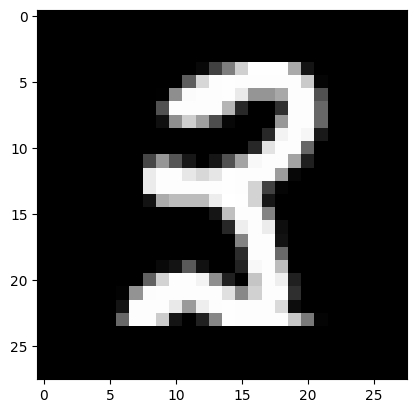

3


In [88]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:,index].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(y_train[:,index]))

In [50]:
y_train[:,1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [221]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    "input is a vector matrix"
    exp = np.exp(x)
    return exp/np.sum(exp, axis =0)#column sum

def derivative_tanh(x):
    return 1 - np.power(np.tanh(x),2)

def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)
a = np.array([[1,1,-4], [3,-5,1],[-9,8,2]])
derivative_relu(a)        

array([[1., 1., 0.],
       [1., 0., 1.],
       [0., 1., 1.]], dtype=float32)

In [266]:
def initialize_parameters(n_x, n_h, n_y):
    """
    n_x: # neurons in input
    n_h: # neurons in hidden layer
    n_y: # neurons in output layer
    """
    w1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1)    )
    print("shape of w1",w1.shape)
    print("shape of b1",b1.shape)
    print("shape of w2",w2.shape)
    print("shape of b2",b2.shape)

    print(w1.shape,b1.shape,w2.shape,b2.shape)
    
    parameter={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    
    return parameter
    

shape of w1 (1000, 784)
shape of b1 (1000, 1)
shape of w2 (1000, 1000)
shape of b2 (1000, 1)
(1000, 784) (1000, 1) (1000, 1000) (1000, 1)


''

In [407]:
def forward_propogation(x,parameters):
    print(x.shape)
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]

    z1 = np.dot(w1,x) +b1
    a1 = tanh(z1)
    z2 =np.dot(w2,a1)+b2
    a2 = softmax(z2)
    # print("shape of z1",z1.shape)
    # print("shape of a1",a1.shape)
    # print("shape of z2",z2.shape)
    # print("shape of a2",a2.shape)

    forward_cache = {
        "z1":z1,
        "a1":a1,
        "z2":z2,
        "a2":a2,
    }
    return forward_cache

itr=np.random.randint(2,100)
print(itr)
np.argmax(forward_propogation(x_test[:,itr:itr+9],parameters)["a2"],axis=0)

32
(784, 9)


array([8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

In [381]:
def cost_function(a,y):
    pass

In [ ]:
def back_propogation(x,y,parameters,forward_cache):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]

    a1 = forward_cache["a1"]
    a2 = forward_cache["a2"]
    
    # number of samples
    m= x.shape[1]
    
    dz2 = a2 - y
    dw2 = 1/m * np.dot(dz2,a1.T)
    db1 = 1/m * np.sum(dz2,axis =1,keepdims=True)

    dz1 = np
    

    

In [162]:
import numpy as np

In [203]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))#.reshape(-1,1)
    
    w2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))#.reshape(-1,1)
    print(b1.shape,b2.shape)
    parameters ={
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters
# initialize_parameters(3,5,7)

In [240]:
def relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    return (1 / ( 1 + np.exp(-x)) )

def derivative_sigmoid(x):
    a = (1 / ( 1 + np.exp(-x)) )
    return a * (1-a)

def derivative_relu(x):
    k = x>0
    return np.array(k,dtype=np.float16)
    

def softmax(x):
    inpexp = np.exp(x)
    return np.array(inpexp / np.sum(inpexp , axis =0))


mat = np.array([[1,3,4],[1,0,-1]])
vect = np.array([3,0,0,4,-1])

print(relu(mat))

[[1 3 4]
 [1 0 0]]


In [211]:
def forward_pass(parameters,x):
    z1 = np.dot(parameters["w1"],x) +parameters["b1"]
    a1 = relu(z1)

    z2 = np.dot(parameters["w2"],a1) + parameters["b2"]
    a2 = softmax(z2)

    activations={
        "a1":a1,
        "z1":z1,
        "z2":z2,
        "a2":a2
    }
    return activations

In [241]:
def back_propogation(activations,y,parameters,x):
    m = y.shape[1]
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = activations['a1']
    a2 = activations['a2']    
    
    dz2 = (a2 - y)
    
    dw2 = (1/m) * np.dot(dz2 , a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1,keepdims=True)    
    
    dz1 =  np.multiply(np.dot(parameters["w2"].T, dz2) , derivative_relu(activations["a1"]))
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis =1,keepdims = True)

    gradients = {
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2
    }
    return gradients


In [251]:
def update_weights(parameters,gradients,learning_rate):
    new_parameters={}
    new_parameters["w1"] = parameters["w1"] - (learning_rate * gradients["dw1"])
    new_parameters["b1"] = parameters["b1"] - (learning_rate * gradients["db1"])
    new_parameters["w2"] = parameters["w2"] - (learning_rate * gradients["dw2"])
    new_parameters["b2"] = parameters["b2"] - (learning_rate * gradients["db2"])
    # print(new_parameters)
    return new_parameters

In [243]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

In [259]:

def model(x,y,iterations=100):
    n_x = x.shape[0]
    n_y = y.shape[0]
    n_h = 1000
    iterations=100
    parameters = initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        activations = forward_pass(parameters,x)
        cost = cost_function(activations['a2'], y)
        gradients = back_propogation(activations,y,parameters,x)
        parameters = update_weights(parameters, gradients,0.01)      
        if(i%(iterations/10) == 0):
            # print(parameters)
            print("Cost after", i, "iterations is :", cost)     
    return parameters
parameters =model(x_train,y_train)

(1000, 1) (10, 1)
Cost after 0 iterations is : 9.664651154459918


C:\Users\shashan3\AppData\Local\Temp\ipykernel_23188\3742131522.py:17: RuntimeWarning: overflow encountered in exp
  inpexp = np.exp(x)
C:\Users\shashan3\AppData\Local\Temp\ipykernel_23188\3742131522.py:18: RuntimeWarning: invalid value encountered in divide
  return np.array(inpexp / np.sum(inpexp , axis =0))
C:\Users\shashan3\AppData\Local\Temp\ipykernel_23188\3109207080.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum(y*np.log(a2))
C:\Users\shashan3\AppData\Local\Temp\ipykernel_23188\3109207080.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum(y*np.log(a2))


Cost after 10 iterations is : nan
Cost after 20 iterations is : nan
Cost after 30 iterations is : nan
Cost after 40 iterations is : nan
Cost after 50 iterations is : nan
Cost after 60 iterations is : nan
Cost after 70 iterations is : nan
Cost after 80 iterations is : nan
Cost after 90 iterations is : nan


1

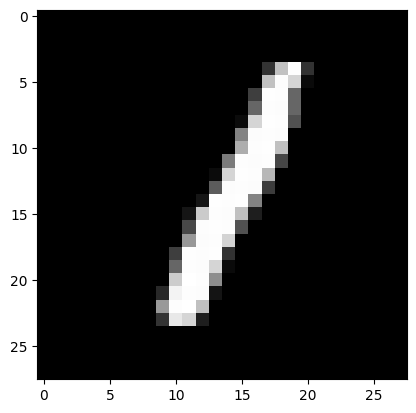

In [155]:
index = np.random.randint(2,777)
plt.imshow(x_train[:,index].reshape(28,28),cmap="grey")
np.argmax(y_train[:,index])


In [263]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_pass(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [264]:
print("Accuracy of Train Dataset", accuracy(x_train, x_train, parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, parameters), 2), "%")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices